In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Stock Price Prediction'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Stock Price Prediction'
/content


In [ ]:
!ls

 checkpoint				        stock_price_LSTM_80.ckpt.index
 Netflix.zip				        stock_price_LSTM.ckpt.data-00000-of-00001
 NFLX.csv				        stock_price_LSTM.ckpt.index
 stock_price_LSTM_60.ckpt.data-00000-of-00001  'Stock Price Prediction.ipynb'
 stock_price_LSTM_60.ckpt.index		        TCS-BSE.csv
 stock_price_LSTM_80.ckpt.data-00000-of-00001


In [ ]:
#Installations
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('TCS-BSE.csv')
df.shape

(4083, 7)

In [ ]:
df.head()

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,1349.80,1358.0,1338.25,1353.20,1185200.0,0.0
1,2005-01-04,1350.75,1356.0,1334.00,1340.35,1312656.0,0.0
2,2005-01-05,1330.00,1338.1,1281.00,1324.80,3669696.0,0.0
3,2005-01-06,1327.00,1345.0,1292.15,1319.90,3441640.0,0.0
4,2005-01-07,1330.00,1344.7,1311.10,1339.40,2627176.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4083 non-null   object 
 1   open             4083 non-null   float64
 2   high             4083 non-null   float64
 3   low              4083 non-null   float64
 4   close            4083 non-null   float64
 5   volume           4083 non-null   float64
 6   dividend_amount  4083 non-null   float64
dtypes: float64(6), object(1)
memory usage: 223.4+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,1349.80,1358.0,1338.25,1353.20,1185200.0,0.0
1,2005-01-04,1350.75,1356.0,1334.00,1340.35,1312656.0,0.0
2,2005-01-05,1330.00,1338.1,1281.00,1324.80,3669696.0,0.0
3,2005-01-06,1327.00,1345.0,1292.15,1319.90,3441640.0,0.0
4,2005-01-07,1330.00,1344.7,1311.10,1339.40,2627176.0,0.0


**STOCK DATA VISUALIZATION & ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Close Price history of TCS (Line Plot)')

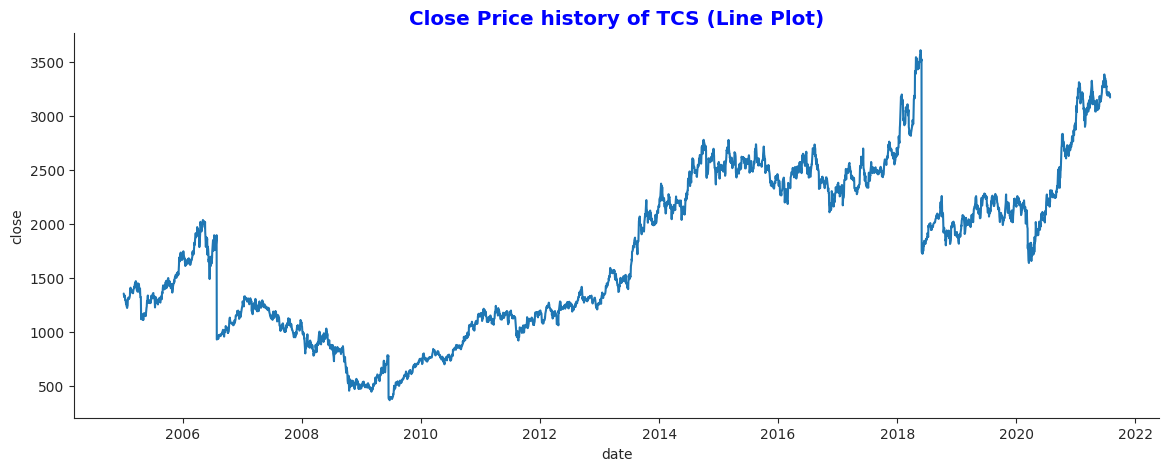

In [ ]:
#Line plot observations of close data

plt.figure(figsize=(14,5))

sns.set_style("ticks")
sns.lineplot(x='date',y='close', data=df)
sns.despine()
plt.title("Close Price history of TCS (Line Plot)",size='x-large',color='blue', fontweight="semibold")

Text(0.5, 1.2, 'Close Price of TCS (Joint Plot)')

<Figure size 2000x1000 with 0 Axes>

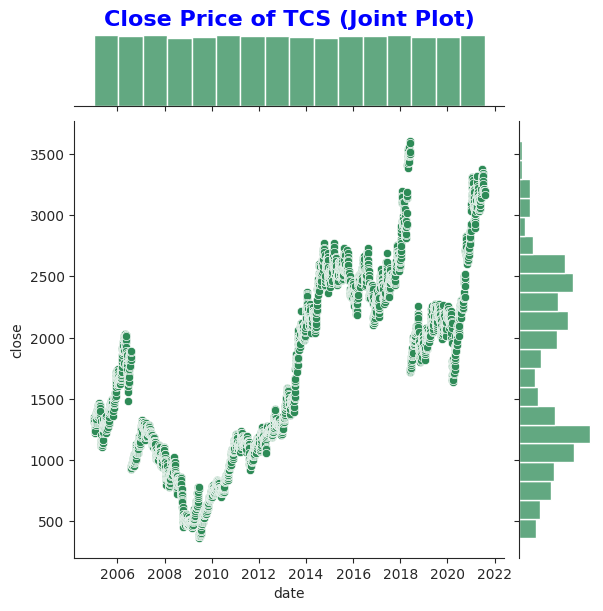

In [ ]:
#Joint plot observations of close data

plt.figure(figsize=(20,10))
sns.jointplot(x='date', y='close', data=df, kind='scatter', color='seagreen')

plt.title("Close Price of TCS (Joint Plot)",size='x-large',color='blue',y=1.2, fontsize = 16, fontweight="semibold")

In [ ]:
#Adding Returns and Cumulative returns to the TCS dataframe

df['returns'] = df['close'].pct_change(1)
df['CumulativeReturn'] = (1+df['returns']).cumprod()
df.head()

,date,open,high,low,close,volume,dividend_amount,returns,CumulativeReturn
0,2005-01-03,1349.80,1358.0,1338.25,1353.20,1185200.0,0.0,NaN,NaN
1,2005-01-04,1350.75,1356.0,1334.00,1340.35,1312656.0,0.0,-0.009496,0.990504
2,2005-01-05,1330.00,1338.1,1281.00,1324.80,3669696.0,0.0,-0.011601,0.979013
3,2005-01-06,1327.00,1345.0,1292.15,1319.90,3441640.0,0.0,-0.003699,0.975392
4,2005-01-07,1330.00,1344.7,1311.10,1339.40,2627176.0,0.0,0.014774,0.989802


In [ ]:
# Moving Average and moving standard deviations

df['Moving_average_20'] = df['close'].rolling(20).mean()
df['Standard_dev_20'] = df['close'].rolling(20).std()
df['Moving_average_100'] = df['close'].rolling(100).mean()
df.head()

,date,open,high,low,close,volume,dividend_amount,returns,CumulativeReturn,Moving_average_20,Standard_dev_20,Moving_average_100
0,2005-01-03,1349.80,1358.0,1338.25,1353.20,1185200.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2005-01-04,1350.75,1356.0,1334.00,1340.35,1312656.0,0.0,-0.009496,0.990504,NaN,NaN,NaN
2,2005-01-05,1330.00,1338.1,1281.00,1324.80,3669696.0,0.0,-0.011601,0.979013,NaN,NaN,NaN
3,2005-01-06,1327.00,1345.0,1292.15,1319.90,3441640.0,0.0,-0.003699,0.975392,NaN,NaN,NaN
4,2005-01-07,1330.00,1344.7,1311.10,1339.40,2627176.0,0.0,0.014774,0.989802,NaN,NaN,NaN


In [ ]:
#Removing Na values and setting the Date from 2006 onwards

df.dropna(inplace=True)
df = df.loc[df['date'] >= '2006-01-01']
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head()

<ipython-input-15-6c2589fdb41d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index',axis=1,inplace=True)


,date,open,high,low,close,volume,dividend_amount,returns,CumulativeReturn,Moving_average_20,Standard_dev_20,Moving_average_100
0,2006-01-02,1707.0,1712.0,1685.1,1689.90,356008.0,0.0,-0.007372,1.248818,1674.4400,42.057603,1476.7880
1,2006-01-03,1685.0,1738.9,1685.0,1731.50,936480.0,0.0,0.024617,1.279560,1683.2525,33.328021,1481.2505
2,2006-01-04,1734.7,1749.0,1722.0,1744.25,1093696.0,0.0,0.007364,1.288982,1690.6800,29.070044,1485.8915
3,2006-01-05,1744.0,1744.0,1722.0,1725.90,636888.0,0.0,-0.010520,1.275421,1696.0050,24.760728,1490.3055
4,2006-01-06,1727.0,1736.8,1699.0,1705.25,656112.0,0.0,-0.011965,1.260161,1696.9550,24.731228,1494.2280


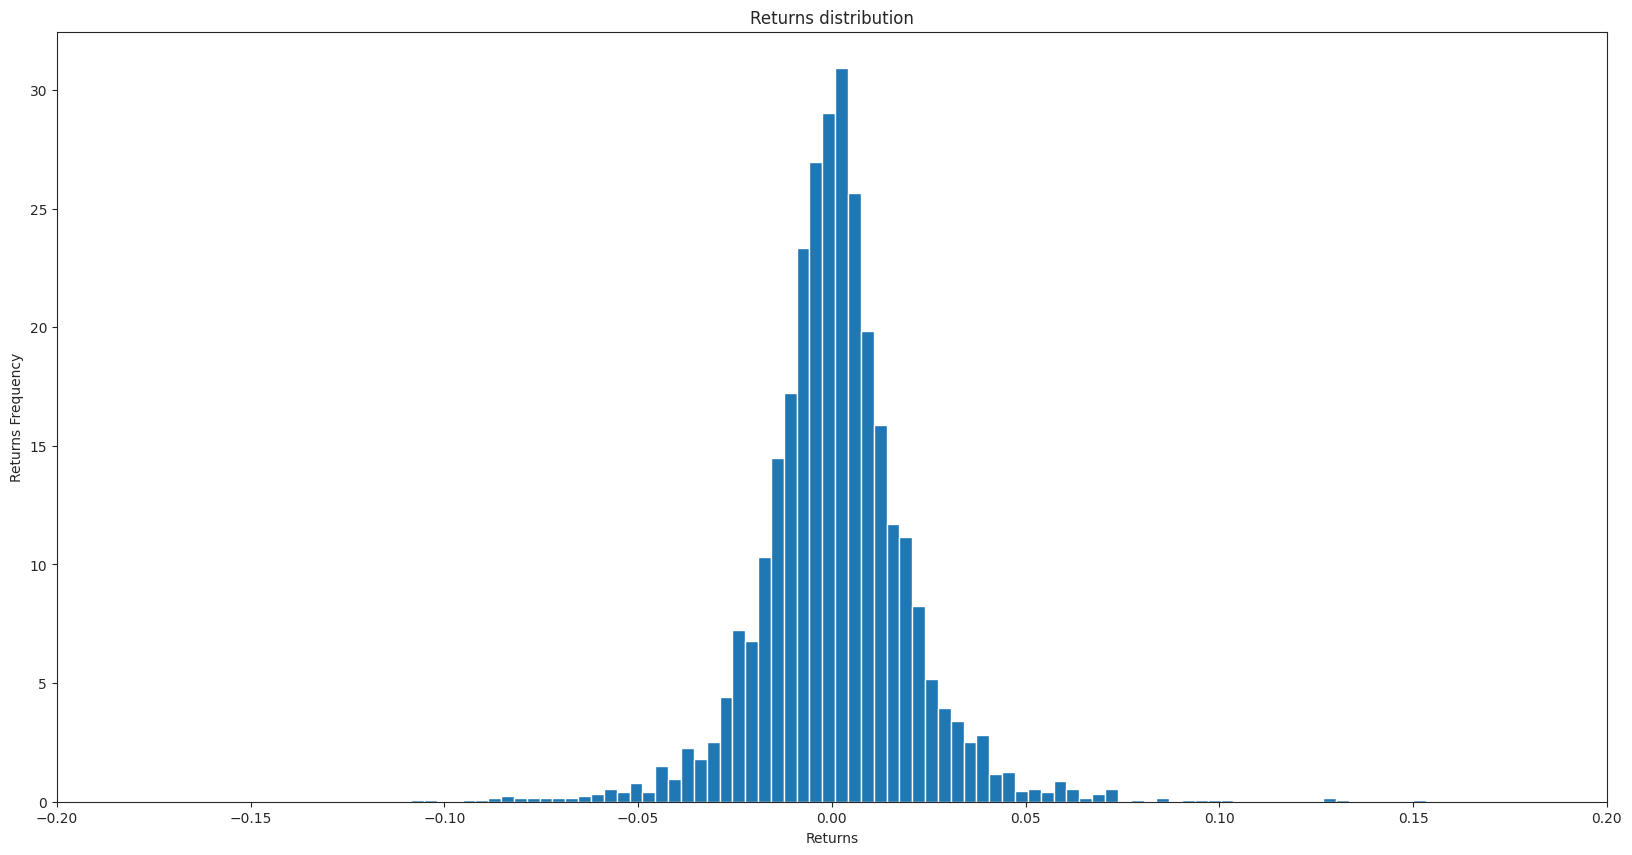

In [ ]:
# Distribution of returns of TCS stock from year 2006

plt.figure(figsize=(20,10))
plt.hist(df['returns'], density=True, bins=200)
plt.title("Returns distribution")
plt.xlabel("Returns")
plt.ylabel("Returns Frequency")
plt.xlim(-0.20, 0.20)
plt.show();

In [ ]:
#Bollinger Bands
df['lower_band'] = df['Moving_average_20'] - 2*df['Standard_dev_20']
df['upper_band'] = df['Moving_average_20'] + 2*df['Standard_dev_20']
df.head()

,date,open,high,low,close,volume,dividend_amount,returns,CumulativeReturn,Moving_average_20,Standard_dev_20,Moving_average_100,lower_band,upper_band
0,2006-01-02,1707.0,1712.0,1685.1,1689.90,356008.0,0.0,-0.007372,1.248818,1674.4400,42.057603,1476.7880,1590.324793,1758.555207
1,2006-01-03,1685.0,1738.9,1685.0,1731.50,936480.0,0.0,0.024617,1.279560,1683.2525,33.328021,1481.2505,1616.596459,1749.908541
2,2006-01-04,1734.7,1749.0,1722.0,1744.25,1093696.0,0.0,0.007364,1.288982,1690.6800,29.070044,1485.8915,1632.539911,1748.820089
3,2006-01-05,1744.0,1744.0,1722.0,1725.90,636888.0,0.0,-0.010520,1.275421,1696.0050,24.760728,1490.3055,1646.483544,1745.526456
4,2006-01-06,1727.0,1736.8,1699.0,1705.25,656112.0,0.0,-0.011965,1.260161,1696.9550,24.731228,1494.2280,1647.492543,1746.417457


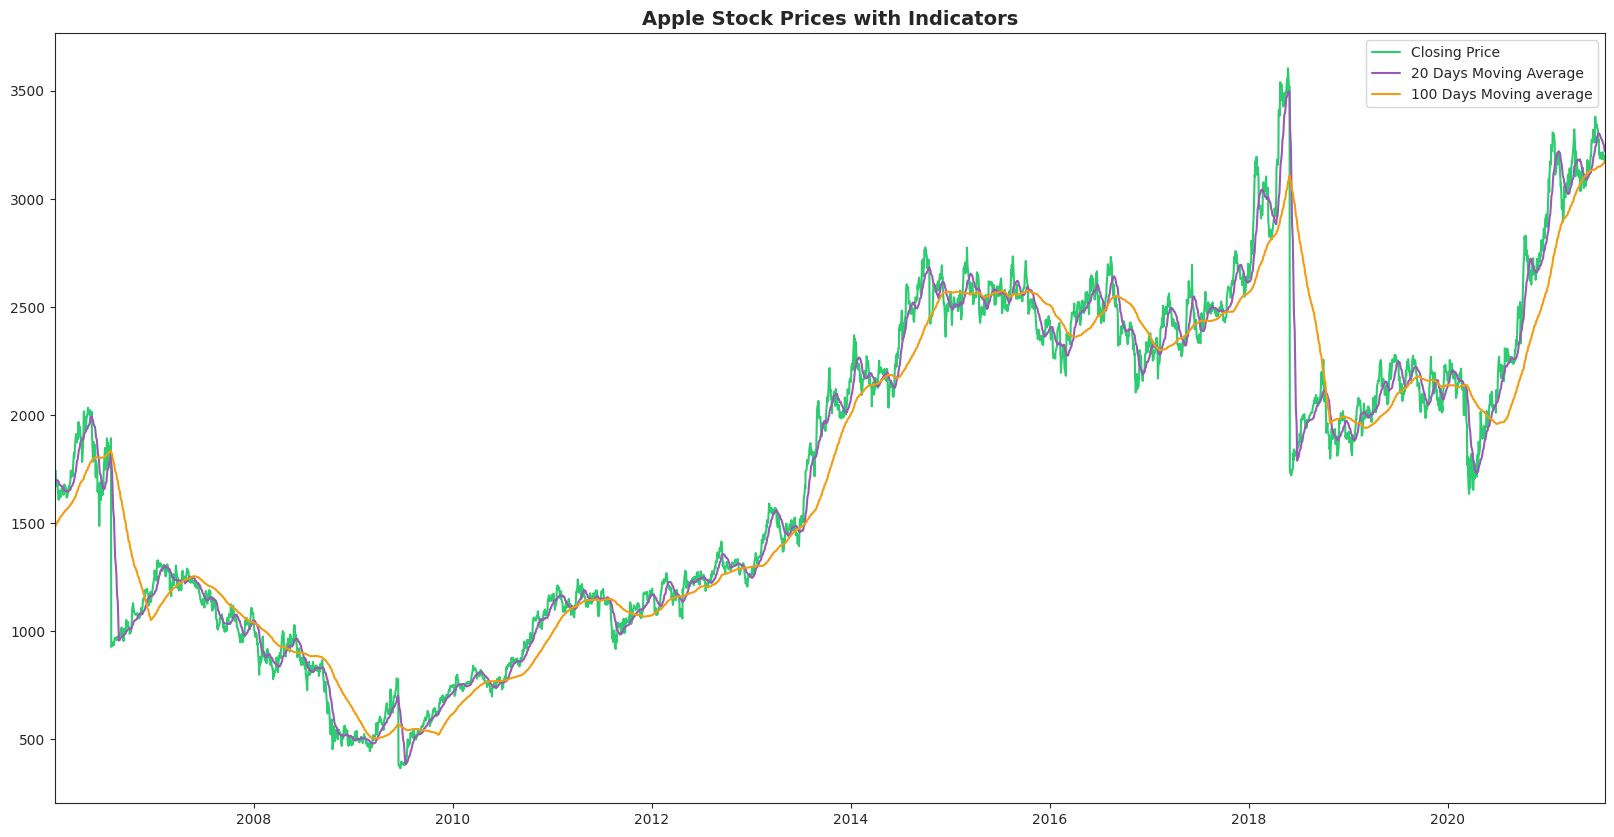

In [ ]:
# "Visualizing TCS Stock Performance with Key Indicators"
dates = df['date']
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dates, df['close'],label="Closing Price", color="#2ecc71")
ax.plot(dates, df['Moving_average_20'], label="20 Days Moving Average", color="#9b59b6")
ax.plot(dates, df['Moving_average_100'], label="100 Days Moving average", color="#f39c12")
ax.set_title("Apple Stock Prices with Indicators", fontsize="14", fontweight="semibold")
ax.set_xlim([dates.min(), dates.max()])
plt.legend();

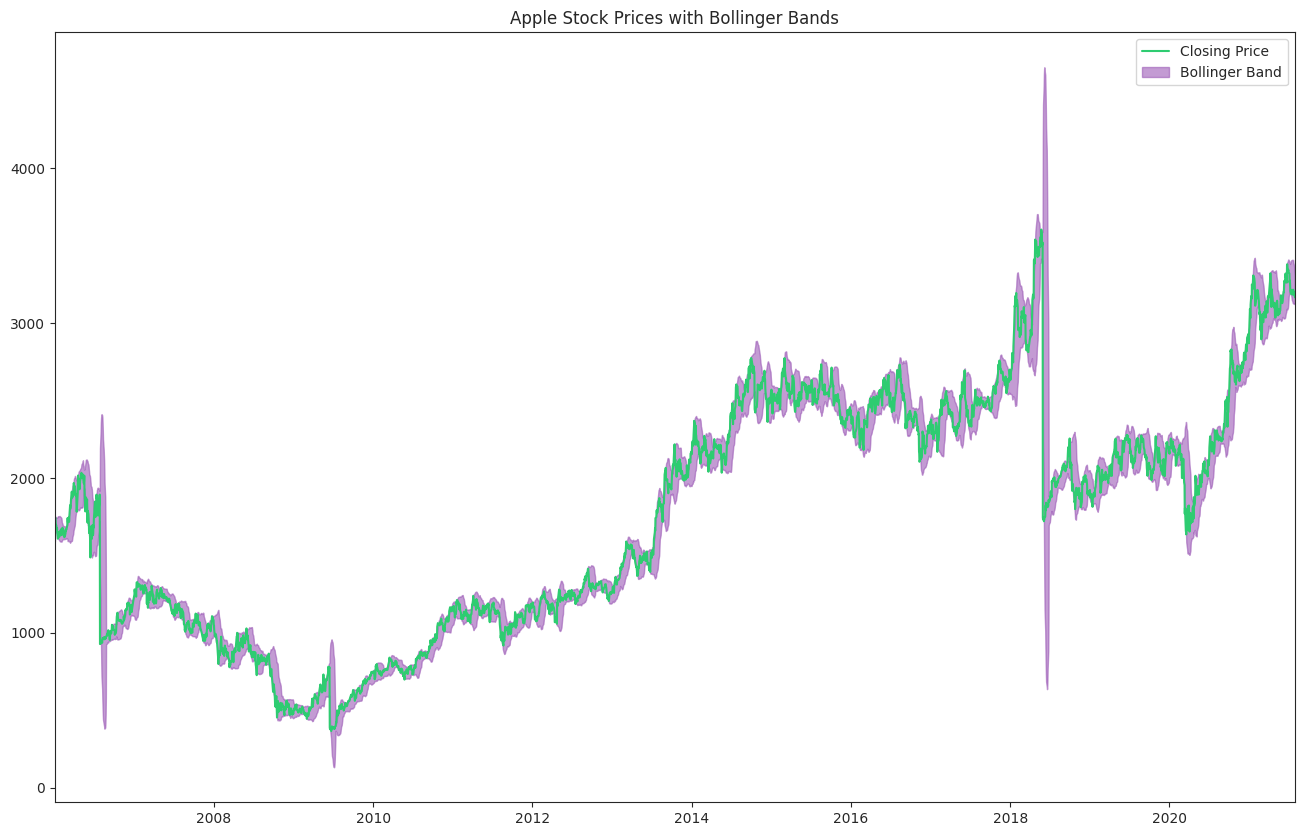

In [ ]:
# "Visualizing TCS Stock Performance with Bollinger bands"

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(dates, df['close'],label="Closing Price", color="#2ecc71")
ax.fill_between(dates, df['upper_band'], df['lower_band'], color='#9b59b6', alpha=0.6, label="Bollinger Band")
ax.set_title('Apple Stock Prices with Bollinger Bands')
ax.set_xlim(dates.min(), dates.max())
plt.legend();

In [ ]:
# Filtering close data

data = df.filter(['close'])

data.head()

,close
0,1689.90
1,1731.50
2,1744.25
3,1725.90
4,1705.25


In [ ]:
# Training data preparation
import numpy as np
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
#training_data_len = int(np.ceil( len(dataset) * .70 ))
#training_data_len = int(np.ceil( len(dataset) * .60 ))

training_data_len

3644

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.40872599],
       [0.42157105],
       [0.42550794],
       ...,
       [0.87423578],
       [0.87395791],
       [0.86497252]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.40872599, 0.42157105, 0.42550794, 0.41984191, 0.4134657 ,
       0.40926635, 0.40309084, 0.40512876, 0.39673007, 0.38351448,
       0.38817699, 0.38684926, 0.39649849, 0.39367319, 0.3877447 ,
       0.3940746 , 0.39652936, 0.39998765, 0.39970975, 0.40261224,
       0.40143889, 0.39195949, 0.39058544, 0.40554561, 0.40332242,
       0.40137714, 0.40238066, 0.39646761, 0.3867875 , 0.38681838,
       0.38828506, 0.38842401, 0.39478478, 0.39969431, 0.39952449,
       0.4023961 , 0.4019175 , 0.40891126, 0.41025443, 0.42431915,
       0.42481319, 0.41626011, 0.42558513, 0.41886926, 0.41693942,
       0.41882295, 0.43171432, 0.45036435, 0.44347866, 0.45200086,
       0.46110974, 0.47625517, 0.47753659, 0.47162354, 0.46530908,
       0.47151547, 0.47077441, 0.46980177, 0.47336812, 0.49464275])]
[0.47796887544000494]

[array([0.40872599, 0.42157105, 0.42550794, 0.41984191, 0.4134657 ,
       0.40926635, 0.40309084, 0.40512876, 0.39673007, 0.38351448,
       0.38817699, 0.38684926, 0.39

In [ ]:
# LSTM Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import regularizers


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Checkpoints for storing the model weights
checkpoint_path = "stock_price_LSTM.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
#Train the model
#model.fit(x_train, y_train, batch_size=1, epochs=1,callbacks=[cp_callback])

In [ ]:
#Loading the model
model.load_weights(checkpoint_path)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE) and mean absolut error (MAE)
print("LSTM model Test data RMSE: ", np.sqrt(np.mean(((predictions - y_test) ** 2))))
print("LSTM model Test data MAE: ", mean_absolute_error(y_test,predictions))

6/6 [==============================] - 1s 34ms/step
LSTM model Test data RMSE:  96.12607119483226
LSTM model Test data MAE:  76.10562576488874


In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-28-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [ ]:
valid

,close,Predictions
3644,2670.8000,2865.456055
3645,2686.4500,2874.100830
3646,2687.6500,2871.045654
3647,2631.4500,2857.556396
3648,2621.7500,2835.815674
...,...,...
3830,3199.3501,3187.210693
3831,3183.0500,3182.643799
3832,3197.5000,3181.522949
3833,3196.6001,3182.757324


In [ ]:
from pmdarima import auto_arima

In [ ]:
model_arima= auto_arima(train_data,trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
              suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(train_data)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20744.275, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-20742.352, Time=1.58 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-20741.546, Time=5.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-20740.239, Time=2.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-20742.349, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-20743.636, Time=2.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-20740.308, Time=2.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-20738.612, Time=4.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-20741.480, Time=1.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-20741.838, Time=2.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-20745.173, Time=2.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-20737.874, Time=1.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-20740.186, Time=1.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-20738.191, Time=5.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-20736

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [ ]:
arima_predictions = model_arima.predict(len(valid['close']))
arima_predictions = np.expand_dims(arima_predictions, axis=1)
arima_predictions = scaler.inverse_transform(arima_predictions)

In [ ]:
# Get the root mean squared error (RMSE) and mean absolut error (MAE)
print("Arima model Test data RMSE: ", np.sqrt(np.mean(((arima_predictions - y_test) ** 2))))
print("Arima model Test data MAE: ", mean_absolute_error(y_test,arima_predictions))

Arima model Test data RMSE:  435.01938910427805
Arima model Test data MAE:  387.720460636306


In [ ]:
random_forest_x_train = x_train[:,:,0]
random_forest_y_train = y_train
random_forest_x_test = x_test[:,:,0]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(random_forest_x_train, random_forest_y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
random_forest_predictions = regressor.predict(random_forest_x_test)

In [ ]:
random_forest_predictions = scaler.inverse_transform(random_forest_predictions.reshape(-1,1))

In [ ]:
# Get the root mean squared error (RMSE) and mean absolut error (MAE)
print("Random forest model Test data RMSE: ", np.sqrt(np.mean(((random_forest_predictions - y_test) ** 2))))
print("Random forest model Test data MAE: ", mean_absolute_error(y_test,random_forest_predictions))

Random forest model Test data RMSE:  141.34795734719845
Random forest model Test data MAE:  107.09170157068057


In [ ]:
# Observed rmse values for various train data sizes
train_data_sizes = [95,70,60]
LSTM_rmse_values_observed = [96.12604387523422,210.17313482393118,166.11207062840293]
ARIMA_rmse_values_observed = [435.01938910427805,445.0298903643944,548.1896333052993]
RFR_rmse_values_observed = [141.34795734719845,293.00305951966936,282.9221580555398]

In [ ]:
rmse_df = pd.DataFrame({
    'Train Data Sizes': train_data_sizes,
    'LSTM RMSE': LSTM_rmse_values_observed,
    'ARIMA RMSE': ARIMA_rmse_values_observed,
    'RFR RMSE': RFR_rmse_values_observed
})
rmse_df

,Train Data Sizes,LSTM RMSE,ARIMA RMSE,RFR RMSE
0,95,96.126044,435.019389,141.347957
1,70,210.173135,445.029890,293.003060
2,60,166.112071,548.189633,282.922158


<Figure size 1500x500 with 0 Axes>

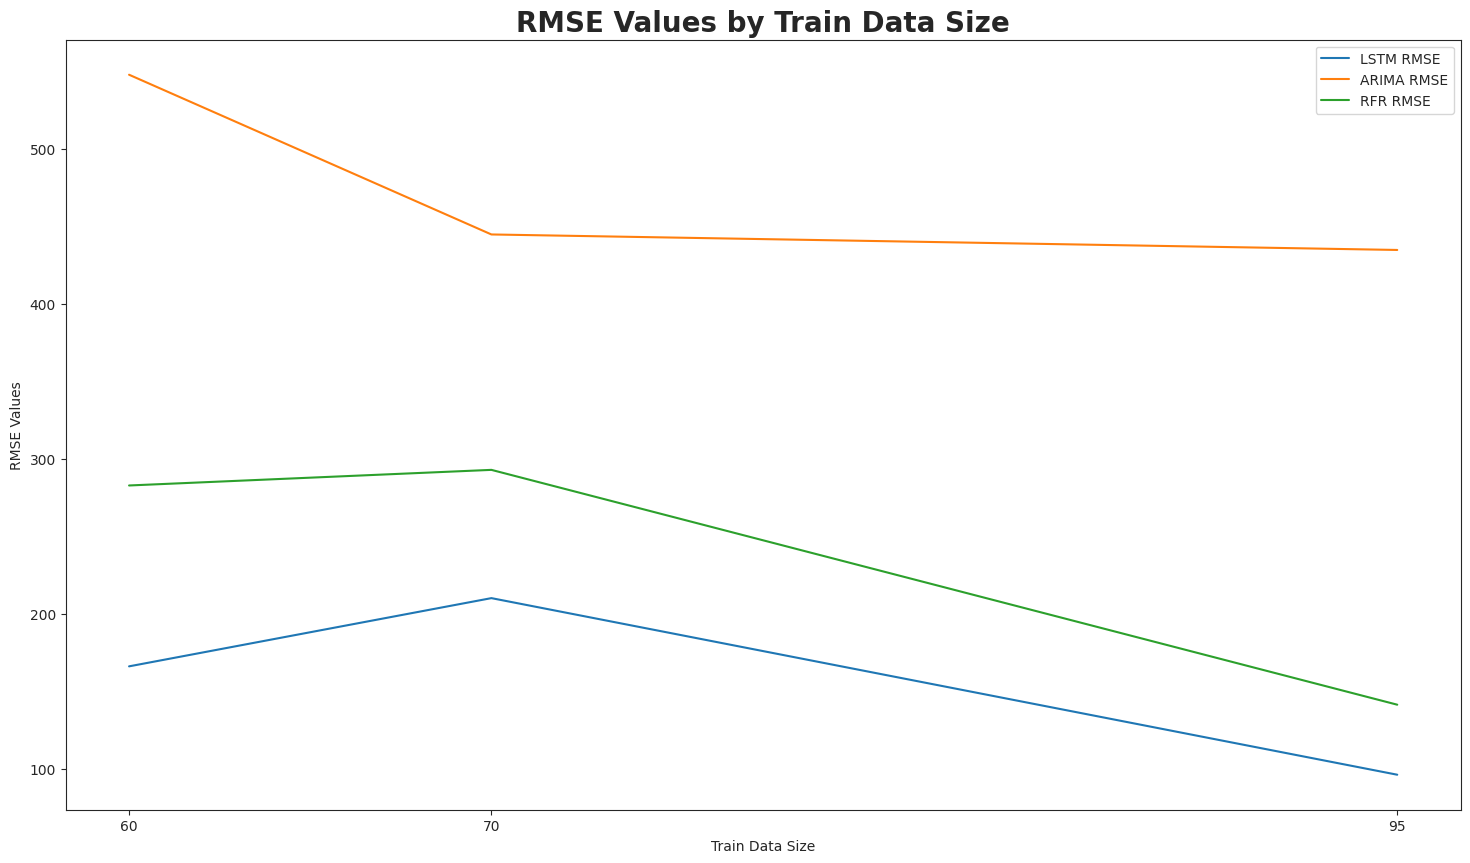

In [ ]:
plt.figure(figsize=(15, 5))

ax = rmse_df.plot(x='Train Data Sizes', kind='line', figsize=(18, 10))
plt.title('RMSE Values by Train Data Size',fontsize = 20, fontweight="semibold")
plt.xlabel('Train Data Size')
plt.ylabel('RMSE Values')
ax.set_xticks(rmse_df['Train Data Sizes'])
plt.xticks(rotation=0)

plt.show()

In [ ]:
# Observed mae values for various train data sizes
LSTM_mae_values_observed = [76.10562959955824,142.51860977836276,98.29750795128137]
ARIMA_mae_values_observed = [387.720460636306,374.5139036698185,433.32519972004707]
RFR_mae_values_observed = [107.09170157068057,173.12509565217383,158.51390156453718]

In [ ]:
mae_df = pd.DataFrame({
    'Train Data Sizes': train_data_sizes,
    'LSTM MAE': LSTM_mae_values_observed,
    'ARIMA MAE': ARIMA_mae_values_observed,
    'RFR MAE': RFR_mae_values_observed
})
mae_df

,Train Data Sizes,LSTM MAE,ARIMA MAE,RFR MAE
0,95,76.105630,387.720461,107.091702
1,70,142.518610,374.513904,173.125096
2,60,98.297508,433.325200,158.513902


<Figure size 1500x500 with 0 Axes>

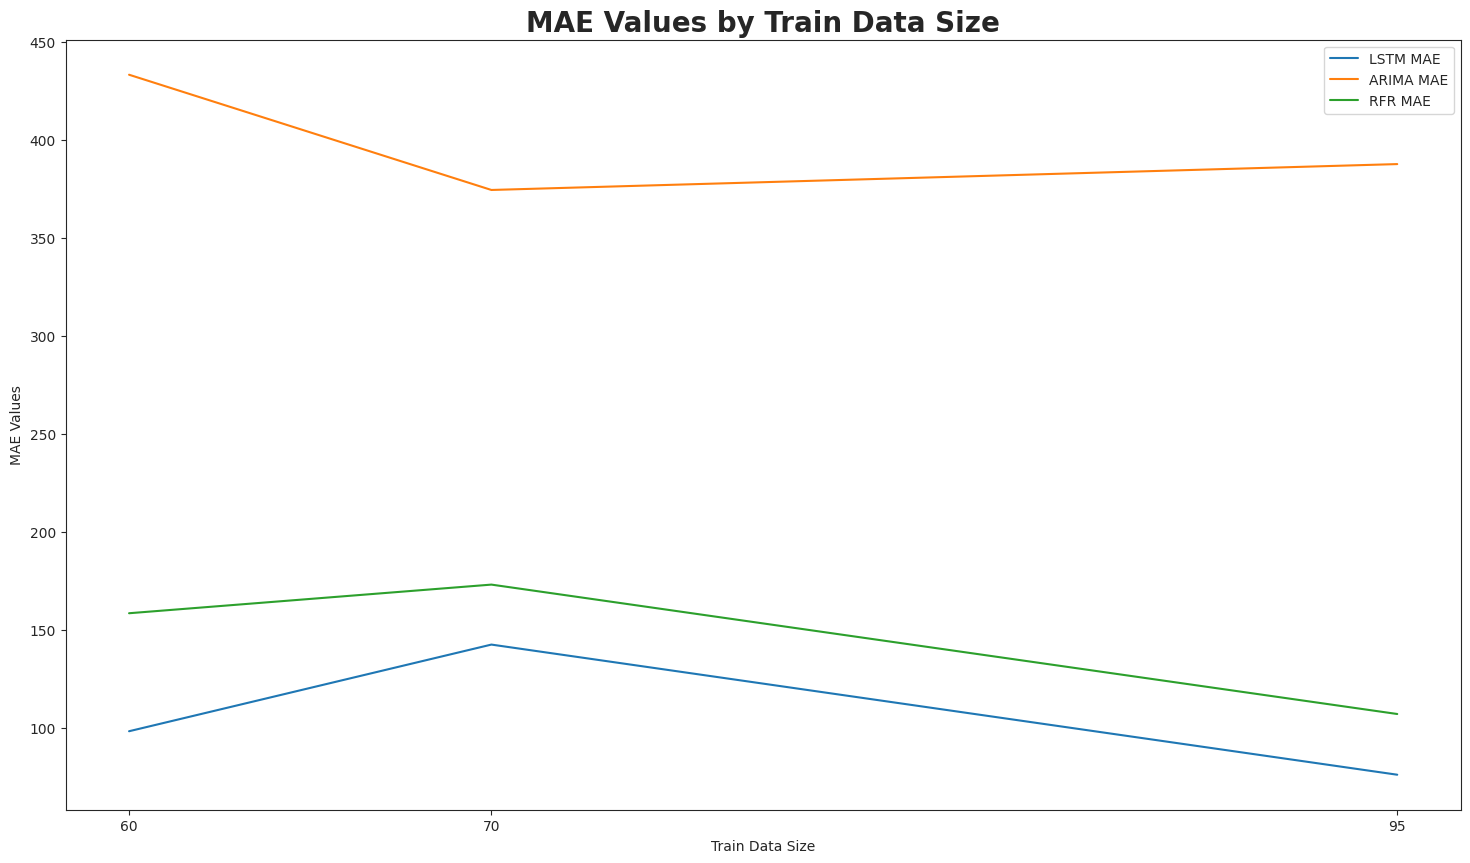

In [ ]:
plt.figure(figsize=(15, 5))

ax = mae_df.plot(x='Train Data Sizes', kind='line', figsize=(18, 10))
plt.title('MAE Values by Train Data Size',fontsize = 20, fontweight="semibold")
plt.xlabel('Train Data Size')
plt.ylabel('MAE Values')
ax.set_xticks(mae_df['Train Data Sizes'])
plt.xticks(rotation=0)

plt.show()